# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [ ]:
# The new version of dataset is only available in the tfds-nightly package.
%pip --no-cache-dir install tfds-nightly --user 
!pip install tensorflow --upgrade --user

In [1]:

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

import json 
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.5.0
	• tf.keras version: 2.5.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
	• GPU device not found. Running on CPU


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

# Create a training set, a validation set and a test set.
training_set, test_set, validation_set = dataset['train'], dataset['test'], dataset['validation']

2021-08-05 02:26:42.351333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-05 02:26:42.351385: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
usage: download_and_prepare.py build [-h] [--helpfull]
                                     [--module_import MODULE_IMPORT]
                                     [--builder_config_id BUILDER_CONFIG_ID]
                                     [--datasets DATASETS_KEYWORD [DATASETS_KEYWORD ...]]
                                     [--overwrite]
                                     [--max_examples_per_split [MAX_EXAMPLES_PER_SPLIT]]
                                     [--data_dir DATA_DIR]
                                     [--download_dir DOWNLOAD_DIR]
                                     [--extract_dir EXT

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [3]:
num_training = dataset_info.splits['train'].num_examples
num_test = dataset_info.splits['test'].num_examples
num_validation = dataset_info.splits['validation'].num_examples
print(f"The training dataset contains {num_training} images")
print(f"The testing dataset contains {num_test} images")
print(f"The validation dataset contains {num_validation} images")

num_class = dataset_info.features['label'].num_classes
print(f"There are {num_class} classes of flower in the dataset from the dataset info")




The training dataset contains 1020 images
The testing dataset contains 6149 images
The validation dataset contains 1020 images
There are 102 classes of flower in the dataset from the dataset info


In [4]:
for image, label in training_set.take(2):
    print('The images in the training set have:')
    print('\u2022 dtype:', image.dtype) 
    print('\u2022 shape:', image.shape)
  
  
    print('\nThe labels of the images have:')
    print('\u2022 dtype:', label.dtype) 



The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (500, 667, 3)

The labels of the images have:
• dtype: <dtype: 'int64'>
The images in the training set have:
• dtype: <dtype: 'uint8'>
• shape: (500, 666, 3)

The labels of the images have:
• dtype: <dtype: 'int64'>


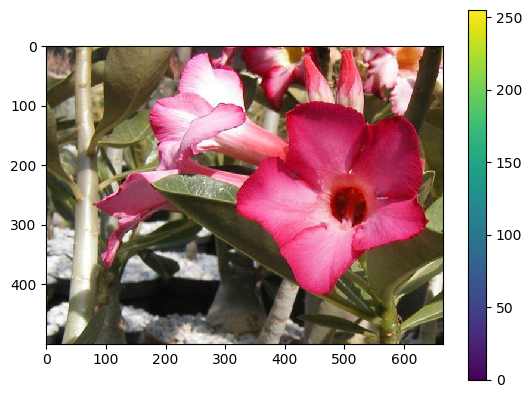

The label of this image is: 85


In [5]:
for image, label in training_set.take(2):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image)
plt.colorbar()
plt.show()
label = label+1
print('The label of this image is:', label)



### Label Mapping


In [6]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [7]:
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

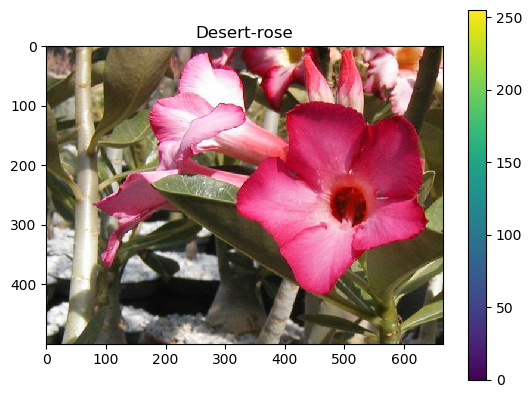

In [8]:
plt.imshow(image)
plt.colorbar()
plt.title(class_names[label.astype(str)].capitalize())
plt.show()

## Create Pipeline

In [9]:
image_size = 224
batch_size = 64
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training//4).map(normalize).batch(batch_size).prefetch(1)
validation_batches = validation_set.cache().map(normalize).batch(batch_size).prefetch(1)
testing_batches = test_set.cache().map(normalize).batch(batch_size).prefetch(1)

# Build and Train the Classifier


In [10]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))
feature_extractor.trainable = False


In [11]:
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Flatten(input_shape = (image_size,image_size, 3)),
        tf.keras.layers.Dense(num_training, activation = 'relu'),
        tf.keras.layers.Dense(400,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(num_class, activation = 'softmax')
])



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1020)              1306620   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               408400    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 102)               40902     
Total params: 4,013,906
Trainable params: 1,755,922
Non-trainable params: 2,257,984
______________________________________

In [12]:
Epochs = 20
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(training_batches,
                    epochs = Epochs,
                    validation_data=validation_batches,
                    callbacks=[early_stopping])

Epoch 1/20
16/16 [==============================] - 50s 3s/step - loss: 4.2951 - accuracy: 0.0971 - val_loss: 3.3043 - val_accuracy: 0.3725
Epoch 2/20
16/16 [==============================] - 44s 3s/step - loss: 2.2588 - accuracy: 0.5108 - val_loss: 1.7725 - val_accuracy: 0.5912
Epoch 3/20
16/16 [==============================] - 45s 3s/step - loss: 1.1067 - accuracy: 0.7225 - val_loss: 1.3298 - val_accuracy: 0.6735
Epoch 4/20
16/16 [==============================] - 44s 3s/step - loss: 0.5866 - accuracy: 0.8569 - val_loss: 1.1319 - val_accuracy: 0.7206
Epoch 5/20
16/16 [==============================] - 44s 3s/step - loss: 0.2986 - accuracy: 0.9294 - val_loss: 1.0090 - val_accuracy: 0.7441
Epoch 6/20
16/16 [==============================] - 44s 3s/step - loss: 0.1868 - accuracy: 0.9578 - val_loss: 0.9371 - val_accuracy: 0.7657
Epoch 7/20
16/16 [==============================] - 44s 3s/step - loss: 0.1068 - accuracy: 0.9863 - val_loss: 0.8495 - val_accuracy: 0.7735
Epoch 8/20
16/16 [==

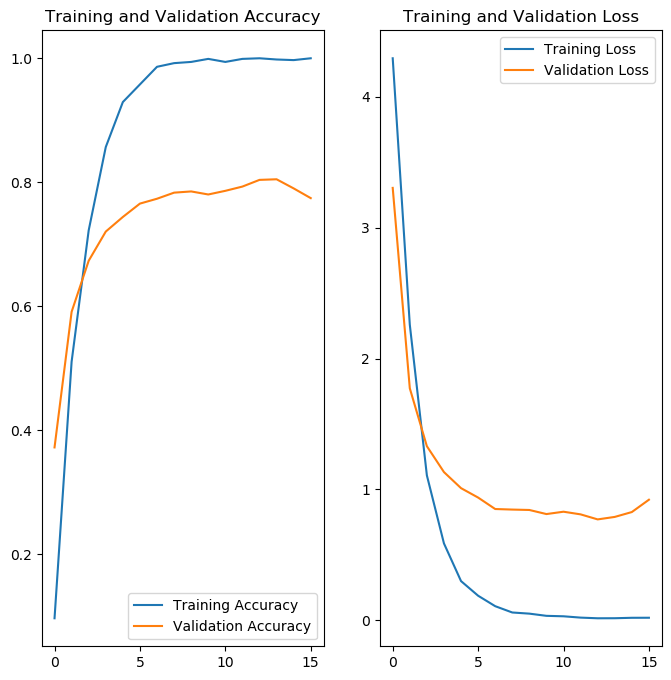

In [13]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(16)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Network Testing



In [14]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))


97/97 [==============================] - 138s 1s/step - loss: 1.0983 - accuracy: 0.7344

Loss on the TEST Set: 1.098
Accuracy on the TEST Set: 73.443%


## Save the Model



In [ ]:
model.save('./model_project.h5')

## Load the Keras Model


In [15]:
loaded_model=tf.keras.models.load_model("model_project.h5",custom_objects={'KerasLayer':hub.KerasLayer},compile=False)
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
flatten_6 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1020)              1306620   
_________________________________________________________________
dense_25 (Dense)             (None, 400)               408400    
_________________________________________________________________
dropout_12 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 102)               40902     
Total params: 4,013,906
Trainable params: 1,755,922
Non-trainable params: 2,257,984
____________________________________

In [16]:
def process_image(image):
    image = tf.convert_to_tensor(image)
    image = tf.image.resize(image, [224, 224])
    image /= 255
    return image.numpy()


In [ ]:
import numpy as np

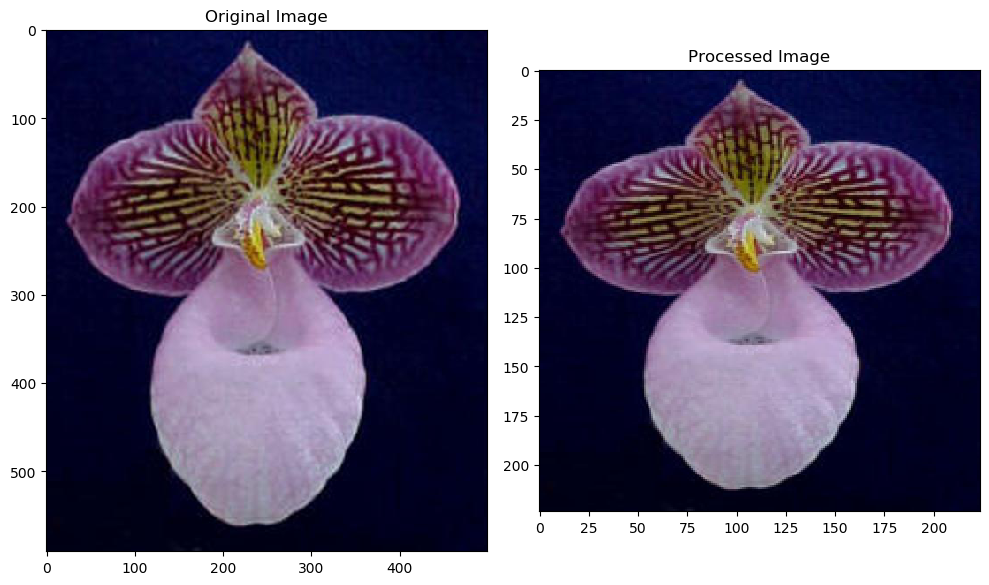

In [17]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

### Inference

 

In [18]:
new_image_path = './test_images/red-rose.jpg'
im = Image.open(new_image_path)
test_image = np.asarray(im)
processed_test_image = process_image(test_image)

def predict(new_image_path,model,top_k):
    
    imageLoad = Image.open(new_image_path)
    imageNp = np.asarray(imageLoad)
    imageProcess = process_image(imageNp)
    imageFinal = np.expand_dims(imageProcess,axis=0)
 
    probs = model.predict(imageFinal)
    prob_predictions= probs[0].tolist()
    probs_final, classes = tf.math.top_k(prob_predictions, k=top_k)
    probs_list = probs_final.numpy().tolist()
    index_shifted = classes.numpy()+1
    index = index_shifted.tolist()
    
    return probs_list, index

probs, classes = predict(new_image_path, loaded_model, 5)



print(probs)
print(classes)

[0.9659982323646545, 0.012460975907742977, 0.003399987705051899, 0.0033664549700915813, 0.0028598729986697435]
[74, 80, 3, 25, 88]


In [19]:
probs[0]

0.9659982323646545

# Sanity Check



In [20]:
print(probs)
print(classes)

[0.9659982323646545, 0.012460975907742977, 0.003399987705051899, 0.0033664549700915813, 0.0028598729986697435]
[74, 80, 3, 25, 88]


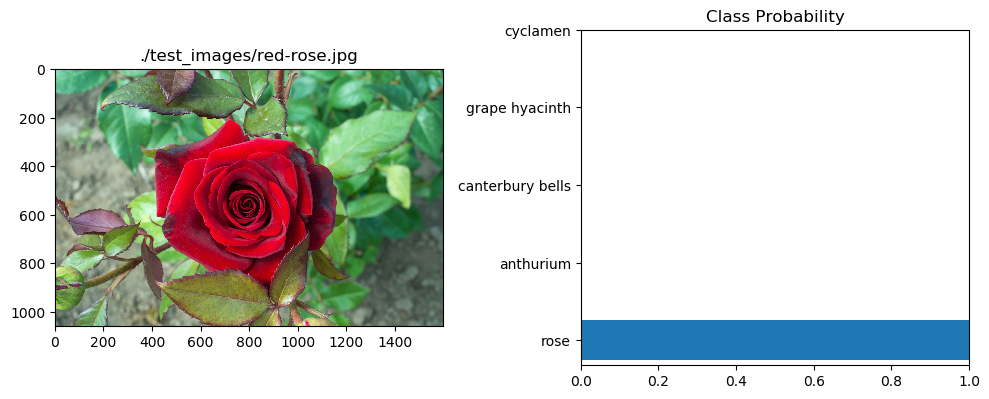

In [21]:
index_name=[]
for i in range(len(classes)):
    index = classes[i]
    flower = class_names.get(str(index))
    index_name.append(flower)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image, cmap = plt.cm.binary)
ax1.set_title(new_image_path)
ax2.barh(probs,np.arange(5),0.5)
ax2.set_aspect(0.2)
ax2.set_yticks(np.arange(5))
ax2.set_yticklabels(index_name)
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1)
plt.tight_layout()

